## Time Shifting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/starbucks.csv
starbucks= "https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/Data/starbucks.csv"

In [3]:
df = pd.read_csv(starbucks, 
                 index_col='Date', 
                 parse_dates=True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


## .shift() forward

In [ ]:
# This method shifts the entire date index a given number of rows, 
# without regard for time periods (months & years).

In [5]:
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [ ]:
df.shift(2).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,38.0061,6906098.0
2015-01-07,37.2781,11623796.0
2015-01-08,36.9748,7664340.0


In [ ]:
#.shift() backwards
df.shift(-2).tail()

,Close,Volume
Date,,
2018-12-24,63.20,11308081.0
2018-12-26,63.39,7712127.0
2018-12-27,64.40,7690183.0
2018-12-28,NaN,NaN
2018-12-31,NaN,NaN


## Shifting based on Time Series Frequency Code

In [ ]:
# We can choose to shift index values up or down 
# without realigning the data by passing in a freq argument.

In [6]:
# Shift everything forward one month
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


## Common codes are 'M' for month-end and 'A' for year-end. 

In [7]:
# Shift everything forward one month
df.shift(periods=1, freq='A').head()

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2015-12-31,37.2781,11623796
2015-12-31,36.9748,7664340
2015-12-31,37.8848,9732554
2015-12-31,38.4961,13170548


In [ ]:
# Shift everything forward one month
df.shift(periods=2, freq='A') #period2

,Close,Volume
Date,,
2016-12-31,38.0061,6906098
2016-12-31,37.2781,11623796
2016-12-31,36.9748,7664340
2016-12-31,37.8848,9732554
2016-12-31,38.4961,13170548
...,...,...
2019-12-31,60.5600,6323252
2019-12-31,63.0800,16646238
2019-12-31,63.2000,11308081


In [8]:
# Shift everything forward one month
df.shift(periods=3, freq='A').head() #period4

,Close,Volume
Date,,
2017-12-31,38.0061,6906098
2017-12-31,37.2781,11623796
2017-12-31,36.9748,7664340
2017-12-31,37.8848,9732554
2017-12-31,38.4961,13170548


## Rolling and Expanding (SMA)

In [ ]:
# The idea is to divide the data into "windows" of time, and then calculate 
# an aggregate function for each window. In this way we obtain a simple moving average.


In [9]:
df = pd.read_csv(starbucks, 
                 index_col='Date', 
                 parse_dates=True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


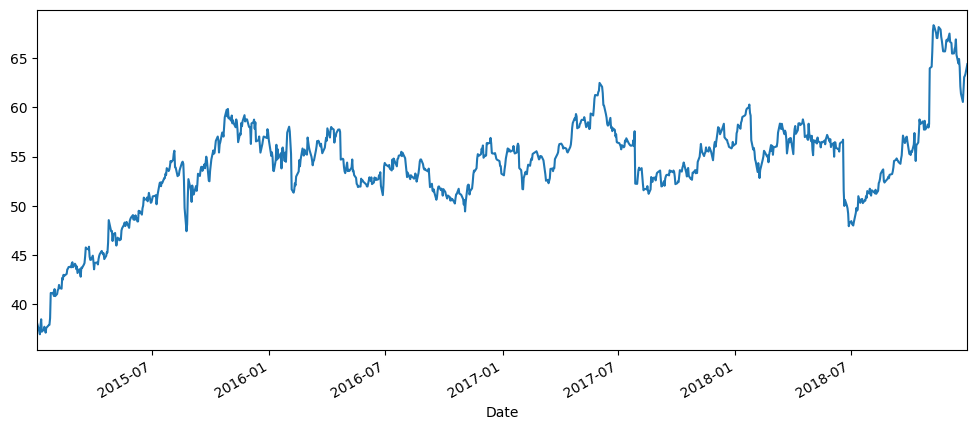

In [12]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

Now let's add in a rolling mean! This rolling method provides row entries, where every entry is then representative of the window. 

In [13]:
# 7 day rolling mean
df.rolling(window=7).mean().head(15)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


## NON ABBIAMO FATTO NIENT'ALTRO CHE PRINTARE LA SMA 30gg

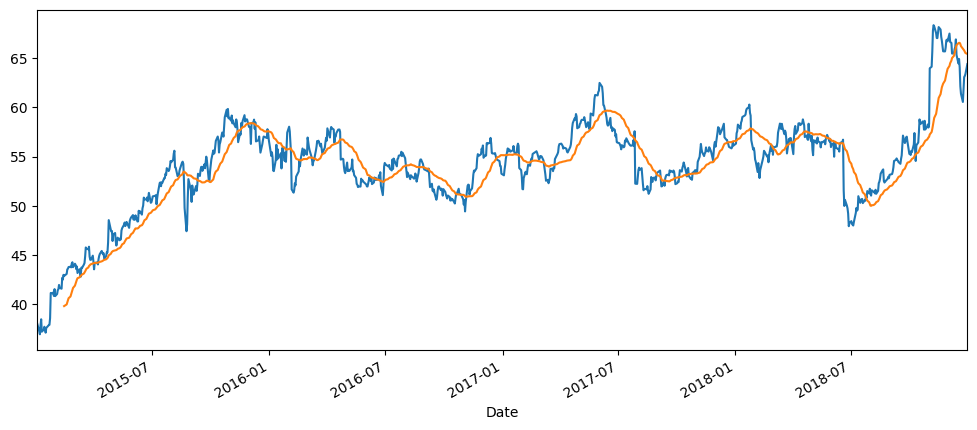

In [14]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['Close'].plot();

**The easiest way to add a legend is to make the rolling value a new column, then pandas does it automatically!**

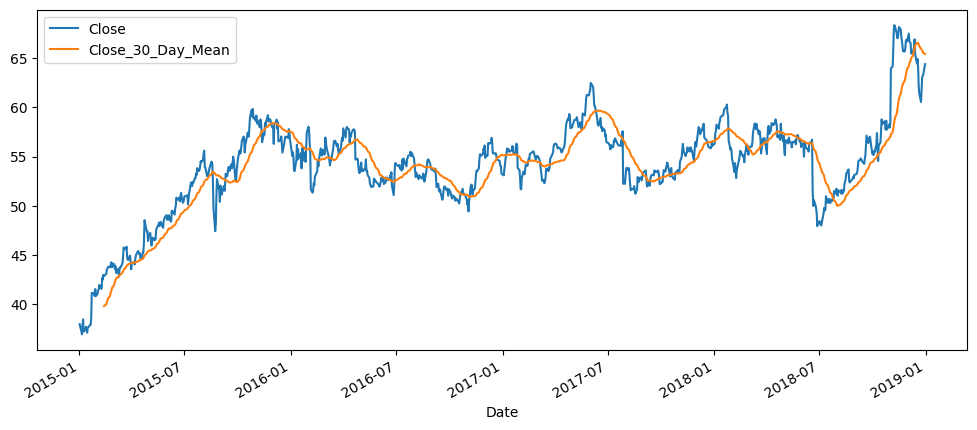

In [15]:
df['Close_30_Day_Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close_30_Day_Mean']].plot(figsize=(12,5));

In [16]:
df.head(30)

,Close,Volume,Close_30_Day_Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN
2015-01-09,37.2361,27556706,NaN
2015-01-12,37.4415,10021486,NaN
2015-01-13,37.7401,11040702,NaN
2015-01-14,37.5301,9295084,NaN


## Expanding

### Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

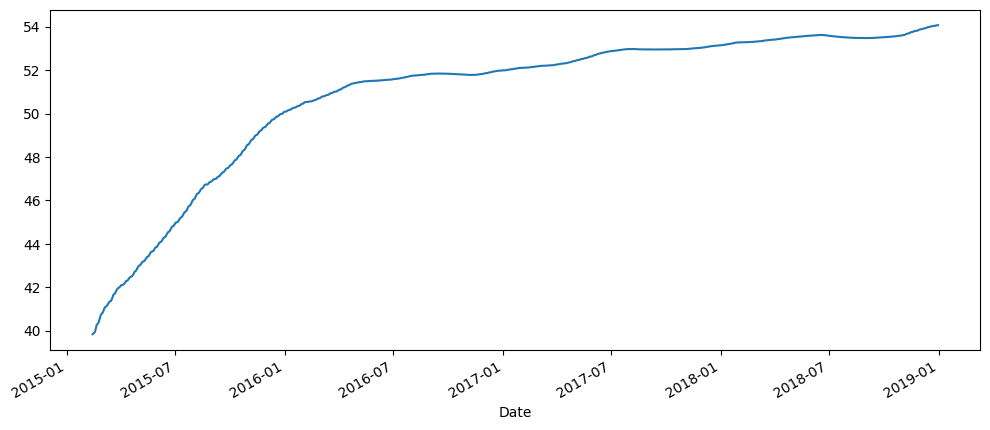

In [17]:
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12,5));

Since all it really gives us is a picture of the "stability" or "volatility" of a stock. However, if you do want to see it, simply uncomment the first plot line above and rerun the cell.

## PLOTTING

In [18]:
df = pd.read_csv(starbucks, 
                 index_col='Date', 
                 parse_dates=True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [19]:
# To show that dates are already parsed
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

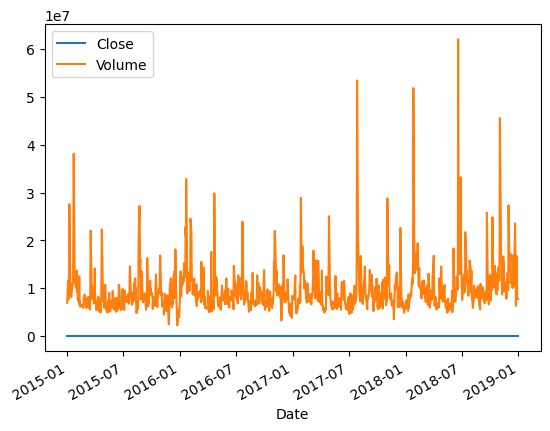

In [20]:
df.plot();

This isn't very helpful due to the difference in y-values, so we'll split them up.

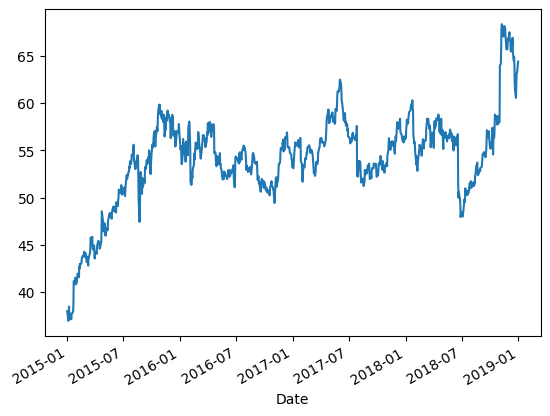

In [21]:
df['Close'].plot();

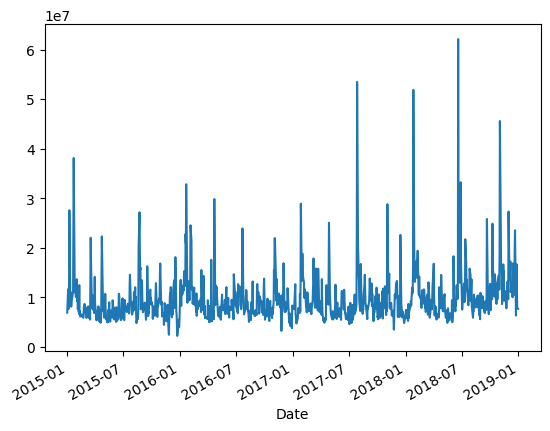

In [22]:
df['Volume'].plot();

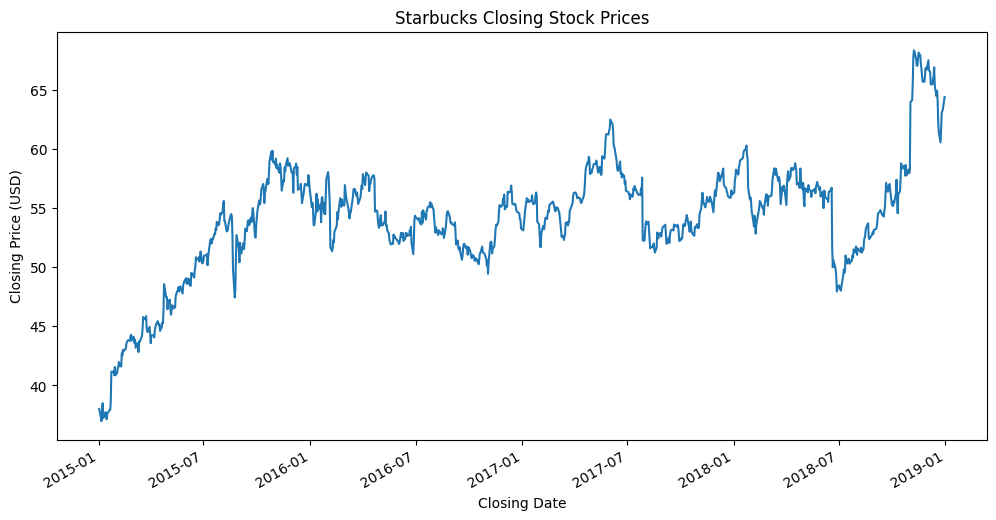

In [23]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Choosing X Limits by Slice:

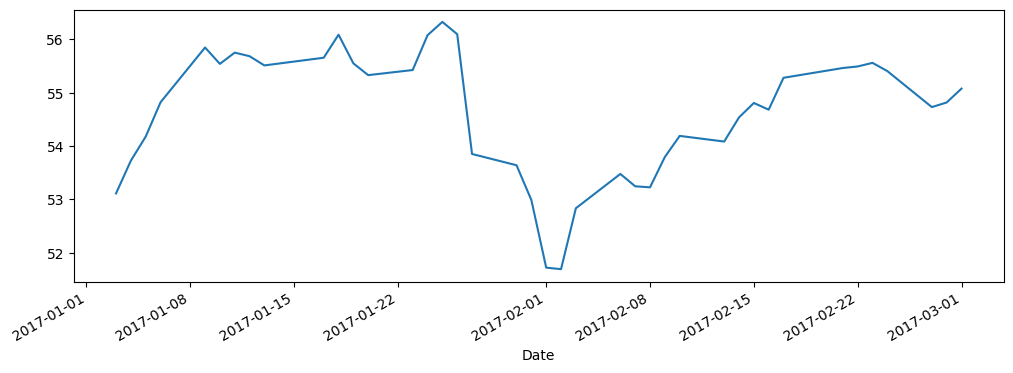

In [ ]:
# Dates are separated by a colon:
df['Close']['2017-01-01':'2017-03-01'].plot(
                            figsize=(12,4));

### Choosing X Limits by Argument:


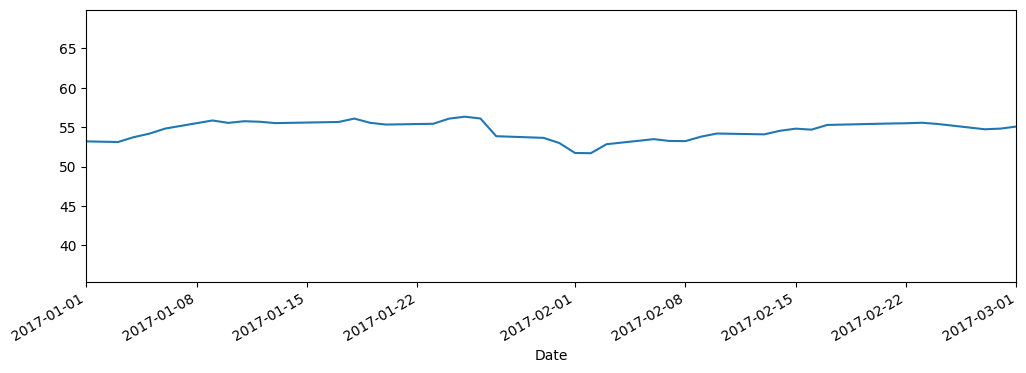

In [ ]:
# Dates are separated by a comma:
df['Close'].plot(figsize=(12,4),
                 xlim=['2017-01-01','2017-03-01']);

In [ ]:
#Now let's focus on the y-axis limits to get a better sense of the shape of the data.

In [24]:
# FIND THE MINIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].min()

51.6899

In [ ]:
# FIND THE MAXIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].max()

56.3244

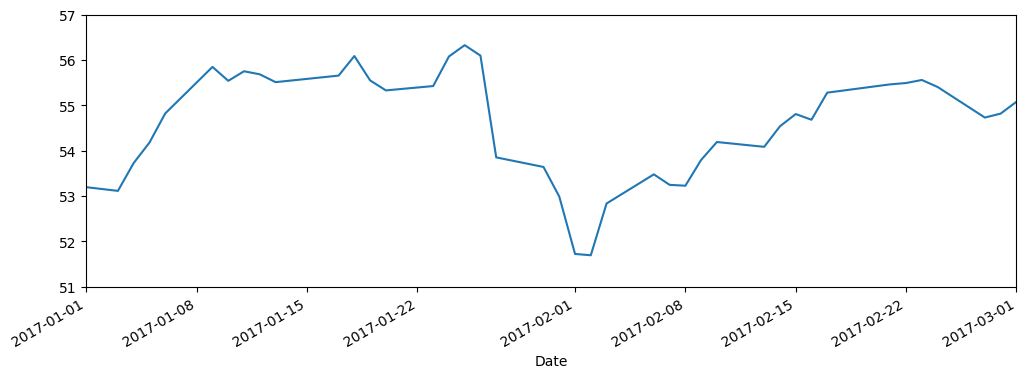

In [ ]:
# PLUG THESE IN AS Y-LIMIT VALUES:
df['Close'].plot(figsize=(12,4),
                 xlim=['2017-01-01','2017-03-01'],
                 ylim=[51,57]);

The above chart might lead you to believe that stocks were many times more valuable in January 2017 than in early February, but a look at them with the y-axis minimum set to zero tells a different story:

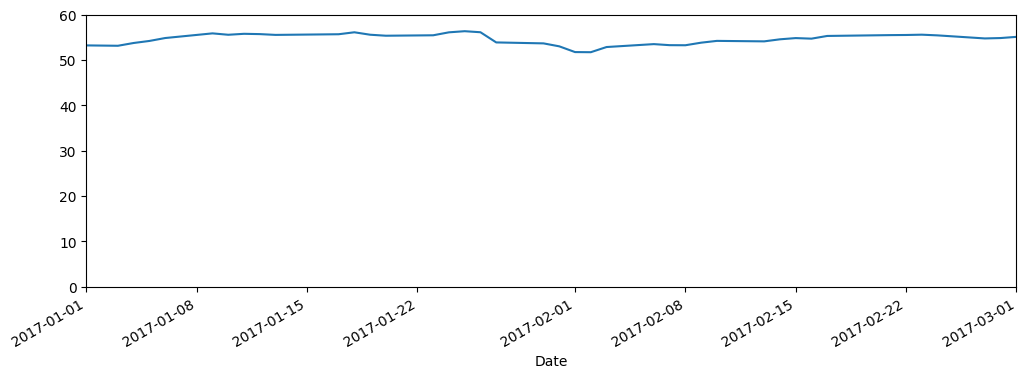

In [ ]:
df['Close'].plot(figsize=(12,4),
                 xlim=['2017-01-01','2017-03-01'],
                 ylim=[0,60]);

### Color and Style

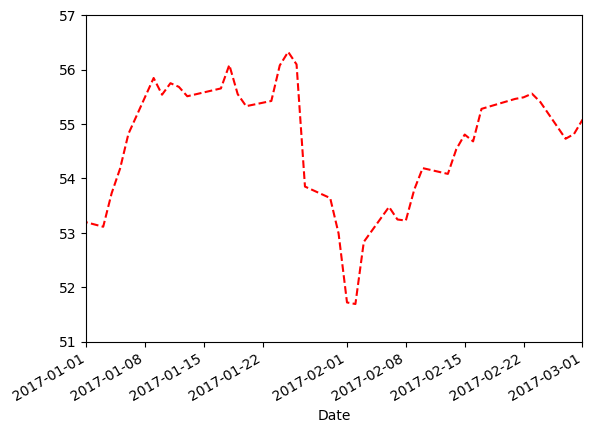

In [ ]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],
                 ylim=[51,57],
                 ls='--',
                 c='r');

## Date Formatting

CODE	              MEANING	EXAMPLE
+ %Y	Year with century as a decimal number.	2001
+ %y	Year without century as a zero-padded decimal number.	01
+ %m	Month as a zero-padded decimal number.	02
+ %B	Month as locale’s full name.	February
+ %b	Month as locale’s abbreviated name.	Feb
+ %d	Day of the month as a zero-padded decimal number.	03
+ %A	Weekday as locale’s full name.	Saturday
+ %a	Weekday as locale’s abbreviated name.	Sat
+ %H	Hour (24-hour clock) as a zero-padded decimal number.	16
+ %I	Hour (12-hour clock) as a zero-padded decimal number.	04
+ %p	Locale’s equivalent of either AM or PM.	PM
+ %M	Minute as a zero-padded decimal number.	05
+ %S	Second as a zero-padded decimal number.	06

CODE	MEANING	EXAMPLE
+ %#m	Month as a decimal number. (Windows)	2
+ %-m	Month as a decimal number. (Mac/Linux)	2
+ %#x	Long date	Saturday, February 03, 2001
+ %#c	Long date and time	Saturday, February 03, 2001 16:05:06

In [ ]:
# USE THIS SPACE TO EXPERIMENT WITH DIFFERENT FORMATS
from datetime import datetime
datetime(2001, 2, 3, 16, 5, 6).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Saturday, February 03, 2001  04:05:06 PM'

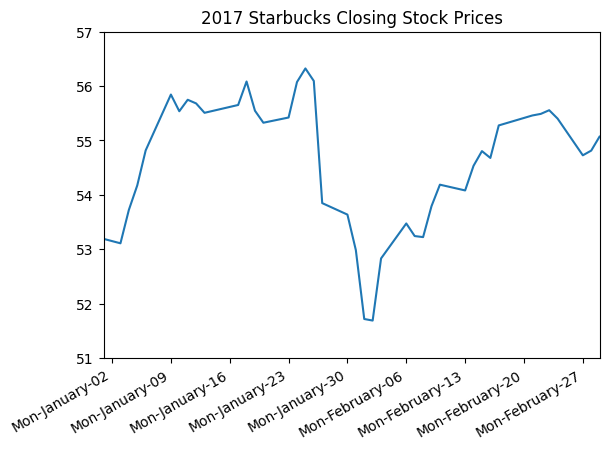

In [ ]:
from matplotlib import dates
title ='2017 Starbucks Closing Stock Prices'
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],
                      ylim=[51,57],
                      title=title)
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))